In [1]:
%matplotlib inline

In [2]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

from fonctions_effetDeSerre import EffetDeSerre

#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 30)
#pd.set_option('max_colwidth', 6)

In [3]:
linestyles = [(0, ()), # solid 
              (0, (5, 10)),(0, (5, 5)),(0, (5, 1)), # dashed (loosely/normal/densely)
              (0, (3, 10, 1, 10)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)), # dotted  (loosely/normal/densely)
              (0, (3, 10, 1, 10, 1, 10)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)), # dashdotted(loosely/normal/densely)
              (0, (1, 10)),(0, (1, 5)),(0, (1, 1))]
couleurs = cm.Dark2.colors

# ACP et effet de serre
***

Les données que nous utiliserons sont issues d’une sélection de la base de données ERA-Interim
du centre européen ECMWF. Il s’agit de données modèles pour 5 variables sur 9 lieux
géographiques. Nous disposons également de mesures de CO 2 réalisées sur le mont Mauna Loa à
Hawaii, données qui proviennent de la NOAA. Pour chacune de ces variables nous avons calculé une
moyenne mensuelle de la période allant de janvier 1982 à décembre 2010, soit 29 années
complètes. Pour les 9 lieux, il y a deux sortes de données :
- les données analysées proviennent des modèles au sortir de l’assimilation des données en se positionnant à midi.
- les données de prévision (dites « Forecast ») sont obtenues en faisant fonctionner le modèle 24 heures après une assimilation, elles sont donc aussi positionnées à midi. Elles présentent plus d’incertitude que les premières.

Liste des variables:
1) Données Analysées à midi :
 - t2 : Temperature at 2 meters (degC) ( Température à 2 mètres ) clim_t2C_J1982D2010.mat
 - tcc : Total cloud cover (0-1) ( Couverture nuageuse total )    clim_tcc_J1982D2010.mat
2) Données de Prévisions à midi (assimilation 24h avant)
 - lsp : Large scale precipitation (m) ( Précipitation à large échelle ) clim_lsp_J1982D2010.mat
 - cp : Convective precipitation (m) ( Précipitation convective ) clim_cp_J1982D2010.mat
 - ssr : Surface solar radiation ((W/m^2)s) ( Radiation solaire de surface ) clim_ssr_J1982D2010.mat
3) co 2 : molfrac ppm (parties par million) clim_co2_J1982D2010.mat

Excepté le CO 2 , les lieux pour lesquels nous avons extrait les valeurs des variables sont dans
l’ordre du nord au sud :
 - Reykjavik .................. 64°08'07.14"N   21°53'42.63"O
 - Oslo ....................... 59°54'49.85"N   10°45'08.18"E
 - Paris ...................... 48°51'12.03"N    2°20'55.59"E
 - New York ................... 40°42'51.67"N   74°00'21.50"O
 - Tunis ...................... 36°49'07.72"N   10°09'57.46"E
 - Alger ...................... 36°45'10.39"N    3°02'31.37"E
 - Beyrouth ................... 33°53'19.06"N   35°29'43.72"E
 - Atlan27N40W ................ 27°00'00.00"N   40°00'00.00"O
 - Dakar ...................... 14°39'46.09"N   17°26'13.65"O


Contenu des fichiers :
- 1 ère colonne : l’année
- 2 ème colonne : le mois
- Colonnes 3 à 11 : valeur de la variable pour les 9 lieux dans l’ordre où on les a énumérés.

Pour le fichier de $CO_2$ on retrouve les mêmes deux 1ères colonnes et une 3ème colonne pour la valeur de concentration du $CO_2$.
A noter que tous les fichiers fournis, pour ce TP, sont en correspondance sur les deux premières colonnes, elles contiennent donc le même nombre de lignes (N=348).



## Chargement des données :

In [4]:
# chargement des données complètes
lesDonnees = EffetDeSerre()
listeDesLieux = list(lesDonnees.noms_des_lieux)
lesNomsDeMesures = list(lesDonnees.noms_des_mesures)

In [5]:
#strChoix = "toutesLesMesures-tousLesTemps-Reykjavik"
strChoix = "toutesLesMesures-interannuelle-Reykjavik"
#strChoix = "toutesLesMesures-climatologie-Reykjavik"
#strChoix = "temperature-climatologie-toutesLesVilles"
if strChoix == "toutesLesMesures-climatologie-Reykjavik":
    seLimiterAUnLieu    = True  # False # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie)
    seLimiterAUneMesure = False # True  # 
    indiceMesure = 0  # -- (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = True  # False # 
    etudeInterAnnuel  = False # True  # 
    label_variables = 'mesures [Moyennes climatologiques]'
    label_temps = 'mois'
elif strChoix == "toutesLesMesures-tousLesTemps-Reykjavik":
    seLimiterAUnLieu    = True  # False # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie)
    seLimiterAUneMesure = False # True  # 
    indiceMesure = 0  # -- (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = False # True  # 
    etudeInterAnnuel  = False # True  # 
    label_variables = 'mesures [Moyennes mensuelles]'
    label_temps = 'mois et années'
elif strChoix == "toutesLesMesures-interannuelle-Reykjavik":
    seLimiterAUnLieu    = True  # False # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie) 
    seLimiterAUneMesure = False # True  # 
    indiceMesure = 0  # -- (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = False # True  # 
    etudeInterAnnuel  = True  # False # 
    label_variables = 'mesures [Moyennes annuelles]'
    label_temps = 'années'
elif strChoix == "temperature-climatologie-toutesLesVilles":
    seLimiterAUnLieu    = False # True  # 
    indiceLieu = 0    # Reykjavik (utilisée ssi seLimiterAUnLieu vraie) 
    seLimiterAUneMesure = True  # False # 
    indiceMesure = 0  # t2 (utilisée ssi seLimiterAUneMesure vraie)
    etudeClimatologie = True  # False # 
    etudeInterAnnuel  = False # True  # 
    label_variables = 'mesures [Moyennes climatologiques]'
    label_temps = 'mois'
else:
    raise ValueError("Choix inattendu")

In [6]:
# choix de limitation à un lieu ou à une mesure
if seLimiterAUnLieu and seLimiterAUneMesure:
    raise ValueError("On ne peut pas se limiter a une ville et une variable.")
elif seLimiterAUnLieu and not seLimiterAUneMesure:
    lesDonnees.seLimiterAUnLieu(listeDesLieux[indiceLieu])
    print('On se limite à un lieu :',listeDesLieux[indiceLieu])
elif seLimiterAUneMesure and not seLimiterAUnLieu:
    lesDonnees.seLimiterAUneMesure(lesNomsDeMesures[indiceMesure])
    print('On se limite à une variable',lesNomsDeMesures[indiceMesure])

On se limite à un lieu : Reykjavik


In [7]:
# On moyenne les données en temps
if etudeClimatologie and etudeInterAnnuel:
    raise ValueError("On ne peut pas avoir une climatologie et des valeurs inter-annuelles.")
elif etudeClimatologie:
    lesDonnees.passerAUneClimatologie()    
    print('On se limite à une climatologie.')
elif etudeInterAnnuel:
    lesDonnees.passerADesMoyennesAnnuelles()
    print('On se limite à des moyennes annuelles.')

On se limite à des moyennes annuelles.


In [8]:
if seLimiterAUneMesure     and not seLimiterAUnLieu:
    transposerVariablesEtColonnes = True
elif not seLimiterAUneMesure and seLimiterAUnLieu:
    transposerVariablesEtColonnes = False
else:
    raise ValueError("Cas innatendu.")
    
if transposerVariablesEtColonnes:
    lesDonnees.transpose()

#### Les données utilisées pour l'ACP

In [9]:
# chargement des donnees (pandas)
df = lesDonnees.df
X = df.to_numpy()
nomDesIndividus = list(lesDonnees.df.index)
nomDesVariables = list(lesDonnees.df)

## on met une partie des individus et des variables de cote
indice_individus = np.array(range(len(nomDesIndividus)))
indice_variables = np.array(range(len(nomDesVariables)))
nombreDIndividus = np.size(X,axis=0)
nombreDeVariables = np.size(X,axis=1)
dimensionDesDonnées = min(nombreDIndividus,nombreDeVariables)
# nettoyage des donnees chargees
# (on ne garde que les informations associees a l'acp.)
del lesDonnees #, nomDesVilles, nomDesVariables_
# %whos

#### Centrage et réduction des données
(Chaque colonne/variable est centrée et réduite.)

In [10]:
moyennes = X.mean(axis=0)
#ecartTypes = X.std(axis=0,ddof=0)
ecartTypes = X.std(axis=0,ddof=1)
Xc = X - moyennes
Xcr = Xc / ecartTypes
#Xcr.std(axis=0,ddof=0)
#np.size(np.cov(Xcr.T,ddof=0),1)

#### Tableau des données (utilisées dans la suite)

In [11]:
etude_centreeReduite = True
if etude_centreeReduite:
    donnees = pd.DataFrame(data=Xcr, index=nomDesIndividus, columns=nomDesVariables)
else:
    donnees = pd.DataFrame(data=X, index=nomDesIndividus, columns=nomDesVariables)    
donnees.columns = [str(col) + '_cr' for col in donnees.columns]
donnees

,t2_cr,tcc_cr,lsp_cr,cp_cr,ssr_cr,CO2_cr
1982,-1.31992,0.56059,-0.11122,1.16748,-0.77590,-1.55480
1983,-1.89212,1.63774,1.79751,0.69668,-1.38939,-1.44819
1984,-0.98354,1.65051,0.89604,0.68086,-2.93695,-1.33586
1985,-0.82341,-1.65422,-1.26425,-1.33936,1.73463,-1.24031
1986,-1.15981,-0.80551,-0.82581,-0.02657,0.86967,-1.14737
1987,1.05568,0.90350,-0.59892,-0.17433,0.52160,-1.02487
1988,-0.85401,0.04623,-0.27508,-0.76651,-0.05746,-0.85788
1989,-1.36239,0.87644,0.92185,1.24105,-1.04747,-0.75532
1990,-0.69303,1.45041,-0.38308,0.05101,-0.85955,-0.66493
1991,0.60202,0.35377,1.05666,0.52210,0.55405,-0.58164


## Réalisation de l'ACP :

In [12]:
if etude_centreeReduite:
    print('Pour rappel, analyse de données réduites')
else:
    print('Pour rappel, analyse de données non réduites')

Pour rappel, analyse de données réduites


On relance l'ACP tant que l'on a une valeur propre trop petite.

In [13]:
reductionDimensionProbleme = 0
acp = PCA()
acp.fit(donnees.to_numpy())
while np.any(acp.explained_variance_<10**-16):
    reductionDimensionProbleme += 1
    acp = PCA(n_components=dimensionDesDonnées-reductionDimensionProbleme)
    acp.fit(donnees.to_numpy())
print('On traite un jeu de données dans un espace de dimension :',dimensionDesDonnées-reductionDimensionProbleme)

On traite un jeu de données dans un espace de dimension : 6


In [14]:
lesNouvellesCoordonnees = acp.fit_transform(donnees.to_numpy())
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, index=nomDesIndividus, columns=list(range(1,acp.n_components_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
1982,-1.94569,1.23336,-0.07430,0.73740,-0.76820,0.07039
1983,-3.50710,0.97591,-0.21965,-0.82869,0.08635,-0.10838
1984,-3.47070,0.64069,1.58730,-0.18579,-0.03688,-0.59715
1985,2.06151,2.33603,-1.17963,0.36327,-0.15060,-0.31773
1986,0.44805,1.74588,-0.88123,0.52123,-0.66484,0.10172
1987,0.01816,0.12389,-0.09848,1.40041,1.27940,-0.13750
1988,-0.12481,1.41938,0.02385,-0.16200,0.25737,-0.10321
1989,-2.44425,0.39606,-0.09581,-0.22010,-0.67855,0.18077
1990,-1.39150,0.79983,0.79636,0.33315,0.50816,0.57872
1991,-0.66003,-0.64153,-1.04761,0.28929,0.49300,-0.50056


### Valeurs propres et vecteurs propres :

In [15]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
#print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.explained_variance_) # a demander demain
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(X,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [9.12 6.76 4.47 2.96 2.73 1.75]
 * inerties des axes/facteurs (ordonnées) :
 [83.09 45.64 19.97  8.78  7.46  3.07]
 * variance des axes/facteurs (ordonnées) :
 [2.97 1.63 0.71 0.31 0.27 0.11]
 * vecteurs propres :
    v_1  : [ 0.28 -0.53 -0.43 -0.43  0.41  0.33]
    v_2  : [-0.63 -0.08 -0.34 -0.4   0.01 -0.57]
    v_3  : [ 0.14  0.14 -0.44 -0.23 -0.81  0.25]
    v_4  : [ 0.43  0.13 -0.58  0.46  0.14 -0.47]
    v_5  : [ 0.37  0.64  0.13 -0.6   0.22 -0.16]
    v_6  : [-0.43  0.51 -0.39  0.19  0.33  0.51]


### Variances et inerties des axes : 

#### Quelques considérations liant sklearn et le cours

In [16]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(Xcr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(Xcr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[2.97 1.63 0.71 0.31 0.27 0.11]  (facteurs)
[1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 5.999999999999997  (facteurs)
 - 6.0  (donnees)


#### Quelques considérations propre à sklearn

In [17]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie cumulées:\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[83.09 45.64 19.97  8.78  7.46  3.07] (methode 1)
[83.09 45.64 19.97  8.78  7.46  3.07] (methode 2)
inertie totale :
167.99999999999991 (methode 1)
167.99999999999991 (methode 2)
pourcentages d'inertie :
 [ 49.457  27.167  11.884   5.226   4.439   1.827]
pourcentages d'inertie cumulées:
 [ 49.457  76.624  88.508  93.734  98.173  100.000]


In [18]:
acp.explained_variance_

array([2.9674, 1.63  , 0.7131, 0.3135, 0.2664, 0.1096])

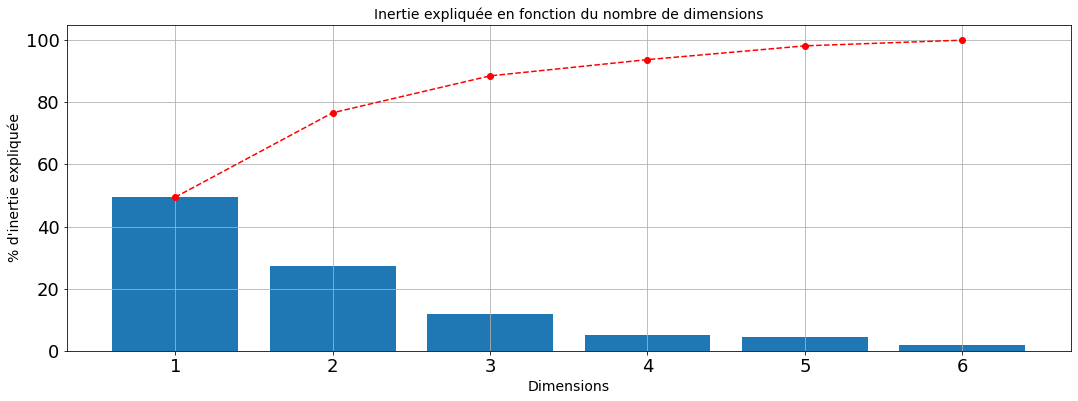

In [19]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [20]:
1/348

0.0028735632183908046

#### Nombre de dimensions à conserver pour garder 95% de l'inertie ou au-delà :

In [21]:
# nombres de dimensions
pourcentageDInertieSeuil = 60
d = np.argmax(np.cumsum(acp.explained_variance_ratio_)>=pourcentageDInertieSeuil/100)+1
print("Nombres de dimensions (>={:.0f}% inertie) : ".format(pourcentageDInertieSeuil),d)
#pourcentageDInertieSeuil = 99
#d = np.argmax(np.cumsum(acp.explained_variance_ratio_)>=pourcentageDInertieSeuil/100)+1
#print("Nombres de dimensions (>={:.0f}% inertie) : ".format(pourcentageDInertieSeuil),d)

Nombres de dimensions (>=60% inertie) :  2


### Qualité de la représentation des individus (sur les nouveaux axes) en % :  
(ratio entre l'inertie de l'individu sur l'axe et l'inertie totale de l'individu)

In [22]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, index=nomDesIndividus, columns=list(range(1,acp.n_components_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
1982,58.68173,23.57957,0.08557,8.42868,9.14765,0.07681
1983,87.81563,6.79985,0.34446,4.90295,0.05324,0.08387
1984,78.38097,2.67098,16.39429,0.22462,0.00885,2.32030
1985,37.43024,48.06285,12.25578,1.16227,0.19975,0.88912
1986,4.22670,64.17821,16.35047,5.72027,9.30651,0.21785
1987,0.00906,0.42137,0.26627,53.84407,44.94017,0.51907
1988,0.72998,94.41028,0.02666,1.22985,3.10403,0.49921
1989,89.41037,2.34752,0.13738,0.72500,6.89066,0.48907
1990,49.46631,16.34329,16.20182,2.83539,6.59694,8.55627
1991,17.27358,16.31885,43.51697,3.31839,9.63718,9.93503


###### La vérification associée

In [24]:
#((qualite['CP_1'].argmax()[0]-1982)*12+qualite['CP_1'].argmax()[1])
qualite['CP_1'].argmax()-1982

-1975

In [52]:
#plesNouvellesCoordonnees.iloc[((plesNouvellesCoordonnees['CP_1'].argmax()[0]-1982)*12+plesNouvellesCoordonnees['CP_1'].argmax()[1])]
#plesNouvellesCoordonnees.iloc[((plesNouvellesCoordonnees['CP_1'].argmax()-1982))]

In [58]:
#qualite.iloc[((plesNouvellesCoordonnees['CP_1'].argmax()[0]-1982)*12+plesNouvellesCoordonnees['CP_1'].argmax()[1])]
qualite.iloc[((plesNouvellesCoordonnees['CP_1'].argmax()))]

CP_1    0.77444
CP_2    0.00002
CP_3    0.21032
CP_4    0.00347
CP_5    0.01159
CP_6    0.00015
Name: 2010, dtype: float64

In [60]:
#donnees.iloc[((plesNouvellesCoordonnees['CP_1'].argmax()[0]-1982)*12+plesNouvellesCoordonnees['CP_1'].argmax()[1])]
donnees.iloc[((plesNouvellesCoordonnees['CP_1'].argmax()))]


t2_cr     1.33418
tcc_cr   -1.40378
lsp_cr   -2.24545
cp_cr    -2.38078
ssr_cr    0.04832
CO2_cr    1.78089
Name: 2010, dtype: float64

In [62]:
#qualite.sum(axis=1)

### Contribution des individus (aux nouveaux axes) en % :  
(ratio entre l'inertie de l'individu sur l'axe et l'inertie totale de l'axe)

In [63]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, index=nomDesIndividus, columns=list(range(1,acp.n_components_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
1982,4.55631,3.33292,0.02765,6.19377,7.91301,0.16142
1983,14.80345,2.08674,0.24164,7.82230,0.09999,0.38269
1984,14.49775,0.89937,12.61927,0.39320,0.01824,11.61659
1985,5.11490,11.95646,6.96959,1.50316,0.30411,3.28866
1986,0.24161,6.67846,3.88949,3.09466,5.92678,0.33706
1987,0.00040,0.03363,0.04857,22.33909,21.94817,0.61590
1988,0.01875,4.41413,0.00285,0.29894,0.88817,0.34704
1989,7.19051,0.34368,0.04598,0.55182,6.17381,1.06459
1990,2.33041,1.40165,3.17642,1.26421,3.46247,10.91066
1991,0.52432,0.90173,5.49694,0.95328,3.25898,8.16251


In [64]:
len(np.arange(1982,2011))

29

# Affichage de la contribution par année

In [65]:
'''mean_contr=np.zeros(29)
for i in range(29):
    for j in range(12):
        mean_contr[i]=mean_contr[i]+plesNouvellesCoordonnees['CP_1'][i*12+j]
mean_contr=mean_contr/29   
te=pd.DataFrame(mean_contr,index=list(np.arange(1982,2011)),columns=[["moyenne"]])
te.plot.bar(y='moyenne')'''

'mean_contr=np.zeros(29)\nfor i in range(29):\n    for j in range(12):\n        mean_contr[i]=mean_contr[i]+plesNouvellesCoordonnees[\'CP_1\'][i*12+j]\nmean_contr=mean_contr/29   \nte=pd.DataFrame(mean_contr,index=list(np.arange(1982,2011)),columns=[["moyenne"]])\nte.plot.bar(y=\'moyenne\')'

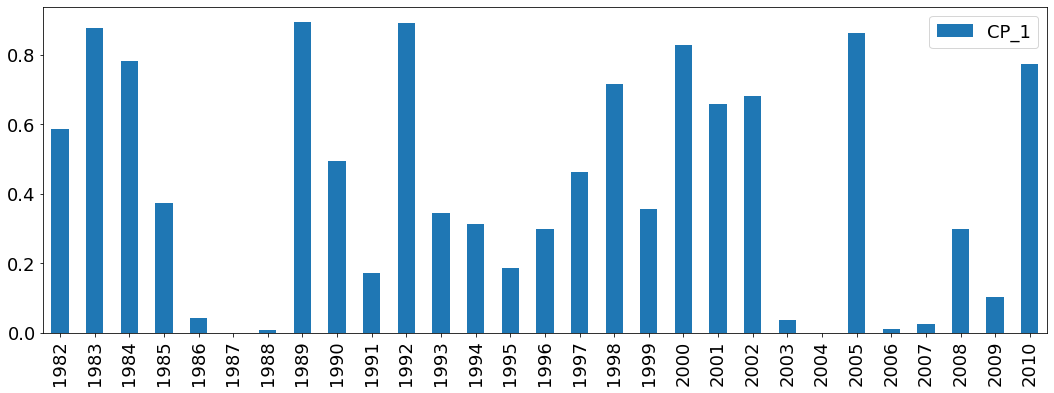

In [69]:
qualite.plot.bar(y='CP_1')

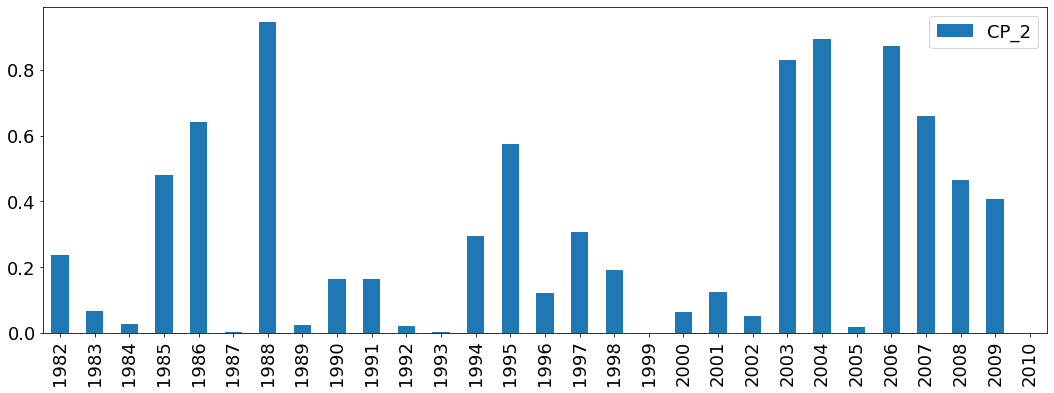

In [33]:
qualite.plot.bar(y='CP_2')

# Affichage de la contribution par mois

In [34]:
'''mean_contr=np.zeros(12)
for i in range(12):
    for j in range(29):
        mean_contr[i]=mean_contr[i]+(plesNouvellesCoordonnees)['CP_3'][i+j*12]
        mean_contr[i]
mean_contr=mean_contr/29
te=pd.DataFrame(mean_contr,index=[1,2,3,4,5,6,7,8,9,10,11,12],columns=[["moyenne"]])
te.plot.bar(y='moyenne')'''

'mean_contr=np.zeros(12)\nfor i in range(12):\n    for j in range(29):\n        mean_contr[i]=mean_contr[i]+(plesNouvellesCoordonnees)[\'CP_3\'][i+j*12]\n        mean_contr[i]\nmean_contr=mean_contr/29\nte=pd.DataFrame(mean_contr,index=[1,2,3,4,5,6,7,8,9,10,11,12],columns=[["moyenne"]])\nte.plot.bar(y=\'moyenne\')'

In [70]:
(contribution*100).describe()

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
count,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000
mean,3.44828,3.44828,3.44828,3.44828,3.44828,3.44828
std,4.56303,4.08339,4.23800,5.36477,4.44878,4.42649
min,0.00040,0.00021,0.00285,0.01952,0.00197,0.02573
25%,0.52432,0.38879,0.20205,0.39320,0.34372,0.33706
50%,1.87797,1.37917,2.29401,1.26421,2.45936,1.06862
75%,4.61892,5.55893,5.40236,3.74746,4.01673,3.36381
max,16.43708,11.95646,18.57674,22.33909,21.94817,14.41179


###### La vérification associée

In [71]:
contribution.sum(axis=0)

CP_1    1.0
CP_2    1.0
CP_3    1.0
CP_4    1.0
CP_5    1.0
CP_6    1.0
dtype: float64

### Corrélations entre anciennes et nouvelles variables
(Cela correspond à la projection des anciennes variables dans la nouvelle base.)

#### Détermination des coordonnées des variables sur les nouveaux axes :

In [72]:
corrOldNew = np.corrcoef(X.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_components_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
t2,0.47552,-0.80299,0.11491,0.24250,0.19227,-0.14178
tcc,-0.91182,-0.10260,0.11696,0.07408,0.33161,0.17006
lsp,-0.73677,-0.43651,-0.37447,-0.32467,0.06705,-0.12842
cp,-0.73288,-0.50894,-0.19343,0.25995,-0.30819,0.06239
ssr,0.70929,0.01115,-0.68239,0.07760,0.11485,0.10912
CO2,0.57166,-0.72458,0.20705,-0.26503,-0.08218,0.16827


#### Interprétation du nouveau système de coordonnées :  
C'est à partir des coordonnées des anciennes variables dans le nouveau référentiel que l'on va pouvoir interpréter les nouveaux axes. 
(Ce sont les valeurs du tableau ci-dessus qui serviront pour représenter le nuage des variables.)

##### Qualité de la représentation des variables dans le nouveau système de coordonnées en % :

In [73]:
qualVar = coordonneesDesVariables**2
qualVar*100

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
t2,22.61240,64.47989,1.32040,5.88046,3.69659,2.01026
tcc,83.14177,1.05264,1.36802,0.54872,10.99677,2.89208
lsp,54.28334,19.05411,14.02255,10.54121,0.44951,1.64927
cp,53.71185,25.90215,3.74160,6.75732,9.49784,0.38923
ssr,50.30983,0.01243,46.56597,0.60213,1.31896,1.19069
CO2,32.68001,52.50217,4.28701,7.02392,0.67540,2.83149


###### La vérification associée

In [39]:
qualVar.sum(axis=1)

t2     1.0
tcc    1.0
lsp    1.0
cp     1.0
ssr    1.0
CO2    1.0
dtype: float64

##### Contribution des variables aux différents axes du nouveau système de coordonnées en % :

In [40]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

,CP_1,CP_2,CP_3,CP_4,CP_5,CP_6
t2,7.62029,39.55739,1.85175,18.75521,13.87866,18.33669
tcc,28.01847,0.64578,1.91853,1.75008,41.28682,26.38033
lsp,18.29328,11.68940,19.66544,33.62025,1.68767,15.04396
cp,18.10069,15.89056,5.24728,21.55188,35.65916,3.55043
ssr,16.95422,0.00762,65.30483,1.92043,4.95195,10.86093
CO2,11.01304,32.20925,6.01217,22.40215,2.53574,25.82765


###### La vérification associée

In [41]:
contrVar.sum(axis=0)

CP_1    1.0
CP_2    1.0
CP_3    1.0
CP_4    1.0
CP_5    1.0
CP_6    1.0
dtype: float64

## Projections du jeu de données

### Représentation des variables dans différents plans factoriels (nuage des variables)
Il s'agit de la projection des anciennes Variables dans différents plans factoriels (i.e. dans le nouveau système de coordonnées et donc en fonction des nouvelles variables)

(basée sur la corrélation entre les nouvelles et les anciennes variables)

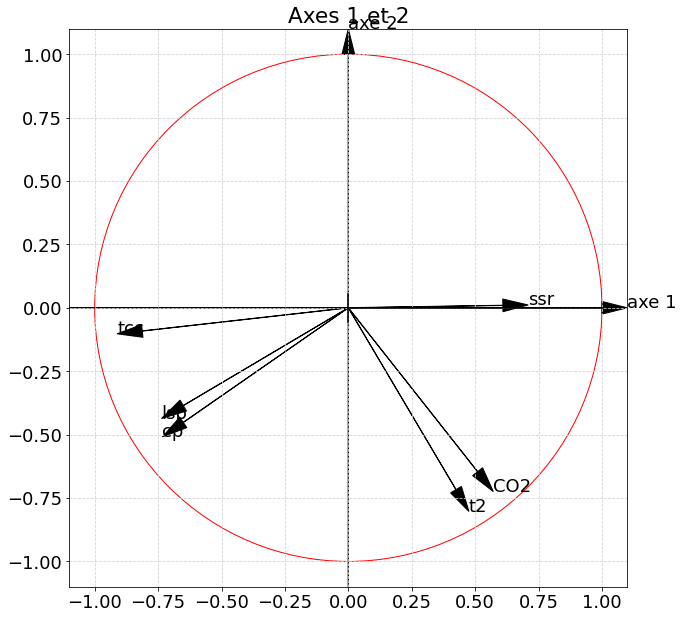

In [42]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')
        

### Représentation du nuage des individus (nouvelles coordonnées) :

In [43]:
        '''
        import matplotlib
import matplotlib.cm as cm


cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        coordonneeAPloter = lesNouvellesCoordonnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.5]
        nomDesIndividusAPloter = np.array(nomDesIndividus)[qualite.iloc[:,i]+qualite.iloc[:,j]>0.5]
        factor_qualite =  qualite[qualite.iloc[:,i]+qualite.iloc[:,j]>0.5]
        colors = cm.rainbow(np.linspace(0, 1,len(np.unique(nomDesIndividusAPloter.T[0]))+1))
        factor = factor_qualite.iloc[:,i]+qualite.iloc[:,j]
        s_linear = factor_qualite
        plt.scatter(coordonneeAPloter[:,i],coordonneeAPloter[:,j],s=s_linear*300,marker=matplotlib.markers.CARETUPBASE,c=colors[nomDesIndividusAPloter.T[1]])
        plt.title('Axes {} et {}'.format(i+1,j+1))
        if len(nomDesIndividusAPloter) != 0 and len(nomDesIndividus) < 500:
            for k in  range(len(nomDesIndividusAPloter)):
                plt.annotate( nomDesIndividusAPloter[k][0],(coordonneeAPloter[k,i], coordonneeAPloter[k,j]),)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))'''

        

'\nimport matplotlib\nimport matplotlib.cm as cm\n\n\ncpt = 0\nplt.subplots(figsize=(18,6*d))\nfor i in range(d-1):\n    for j in range(i+1,d):\ncpt += 1\nax = plt.subplot(\'{}{}{}\'.format(int(d*(d-1)/2),1,cpt))\ncoordonneeAPloter = lesNouvellesCoordonnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.5]\nnomDesIndividusAPloter = np.array(nomDesIndividus)[qualite.iloc[:,i]+qualite.iloc[:,j]>0.5]\nfactor_qualite =  qualite[qualite.iloc[:,i]+qualite.iloc[:,j]>0.5]\ncolors = cm.rainbow(np.linspace(0, 1,len(np.unique(nomDesIndividusAPloter.T[0]))+1))\nfactor = factor_qualite.iloc[:,i]+qualite.iloc[:,j]\ns_linear = factor_qualite\nplt.scatter(coordonneeAPloter[:,i],coordonneeAPloter[:,j],s=s_linear*300,marker=matplotlib.markers.CARETUPBASE,c=colors[nomDesIndividusAPloter.T[1]])\nplt.title(\'Axes {} et {}\'.format(i+1,j+1))\nif len(nomDesIndividusAPloter) != 0 and len(nomDesIndividus) < 500:\n    for k in  range(len(nomDesIndividusAPloter)):\n        plt.annotate( nomDesIndividusAPloter[k][0],(coor

In [44]:
ancienne_a_ploter.columns

NameError: name 'ancienne_a_ploter' is not defined

In [45]:
'''correct part 1
import matplotlib
import matplotlib.cm as cm


cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        coordonneeAPloter = lesNouvellesCoordonnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]
        nomDesIndividusAPloter = np.array(nomDesIndividus)[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]
        factor_qualite =  qualite[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]
        ancienne_a_ploter = donnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]
        colors = cm.rainbow(np.linspace(0, 1,max(np.unique(nomDesIndividusAPloter.T[0]-1982))+1))
        factor = factor_qualite.iloc[:,i]+qualite.iloc[:,j]
        s_linear = factor_qualite
        plt.scatter(coordonneeAPloter[:,i],coordonneeAPloter[:,j],s=s_linear*1000+100,marker=matplotlib.markers.CARETUPBASE,c=colors[nomDesIndividusAPloter.T[0]-1982])
        plt.title('Axes {} et {}'.format(i+1,j+1))
        if len(nomDesIndividusAPloter) != 0 and len(nomDesIndividus) < 500:
            for k in  range(len(nomDesIndividusAPloter)):
                t = str(nomDesIndividusAPloter[k])+"\nt2_cr"+str(round(ancienne_a_ploter['t2_cr'][k],2))+"\ntcc_cr"+str(round(ancienne_a_ploter['tcc_cr'][k],2))+"\nlsp_cr"+str(round(ancienne_a_ploter['lsp_cr'][k],2))+"\nlcp_cr"+str(round(ancienne_a_ploter['cp_cr'][k],2))+"\nlssr_cr"+str(round(ancienne_a_ploter['ssr_cr'][k],2))
                plt.annotate(t,(coordonneeAPloter[k,i], coordonneeAPloter[k,j]),)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

'''

'correct part 1\nimport matplotlib\nimport matplotlib.cm as cm\n\n\ncpt = 0\nplt.subplots(figsize=(18,6*d))\nfor i in range(d-1):\n    for j in range(i+1,d):\n        cpt += 1\n        ax = plt.subplot(\'{}{}{}\'.format(int(d*(d-1)/2),1,cpt))\n        coordonneeAPloter = lesNouvellesCoordonnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]\n        nomDesIndividusAPloter = np.array(nomDesIndividus)[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]\n        factor_qualite =  qualite[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]\n        ancienne_a_ploter = donnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.95]\n        colors = cm.rainbow(np.linspace(0, 1,max(np.unique(nomDesIndividusAPloter.T[0]-1982))+1))\n        factor = factor_qualite.iloc[:,i]+qualite.iloc[:,j]\n        s_linear = factor_qualite\n        plt.scatter(coordonneeAPloter[:,i],coordonneeAPloter[:,j],s=s_linear*1000+100,marker=matplotlib.markers.CARETUPBASE,c=colors[nomDesIndividusAPloter.T[0]-1982])\n        plt.title(\'Axes {} et {}\'.for

In [46]:
ancienne_a_ploter['t2_cr'].iloc[5]

NameError: name 'ancienne_a_ploter' is not defined

ValueError: s must be a scalar, or the same size as x and y

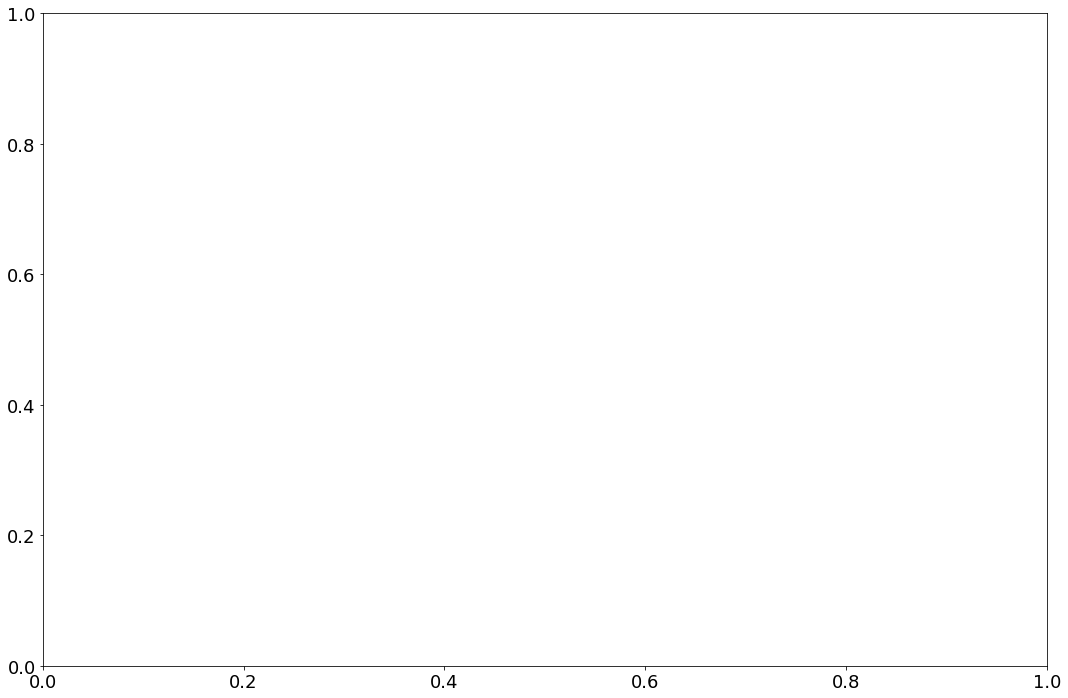

In [74]:
import matplotlib
import matplotlib.cm as cm


cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        coordonneeAPloter = lesNouvellesCoordonnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.8]
        nomDesIndividusAPloter = np.array(nomDesIndividus)[qualite.iloc[:,i]+qualite.iloc[:,j]>0.8]
        factor_qualite =  qualite[qualite.iloc[:,i]+qualite.iloc[:,j]>0.8]
        ancienne_a_ploter = donnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.8]
        colors = cm.rainbow(np.linspace(0, 1,len(np.unique(nomDesIndividusAPloter))+1))
        #colors = zip(nomDesIndividusAPloter)
        factor = factor_qualite.iloc[:,i]+qualite.iloc[:,j]
        s_linear = factor_qualite
        plt.scatter(coordonneeAPloter[:,i],coordonneeAPloter[:,j],s=s_linear*1000,marker=matplotlib.markers.CARETUPBASE)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        if len(nomDesIndividusAPloter) != 0 and len(nomDesIndividus) < 500:
            for k in  range(len(nomDesIndividusAPloter)):
                t = str(nomDesIndividusAPloter[k])+"\nt2_cr"+str(round(ancienne_a_ploter['t2_cr'].iloc[k],2))+"\ntcc_cr"+str(round(ancienne_a_ploter['tcc_cr'].iloc[k],2))+"\nlsp_cr"+str(round(ancienne_a_ploter['lsp_cr'].iloc[k],2))+"\nlcp_cr"+str(round(ancienne_a_ploter['cp_cr'].iloc[k],2))+"\nlssr_cr"+str(round(ancienne_a_ploter['ssr_cr'].iloc[k],2))
                plt.annotate(t,(coordonneeAPloter[k,i], coordonneeAPloter[k,j]),)#,fontsize=fontsize)
                    
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))


ValueError: s must be a scalar, or the same size as x and y

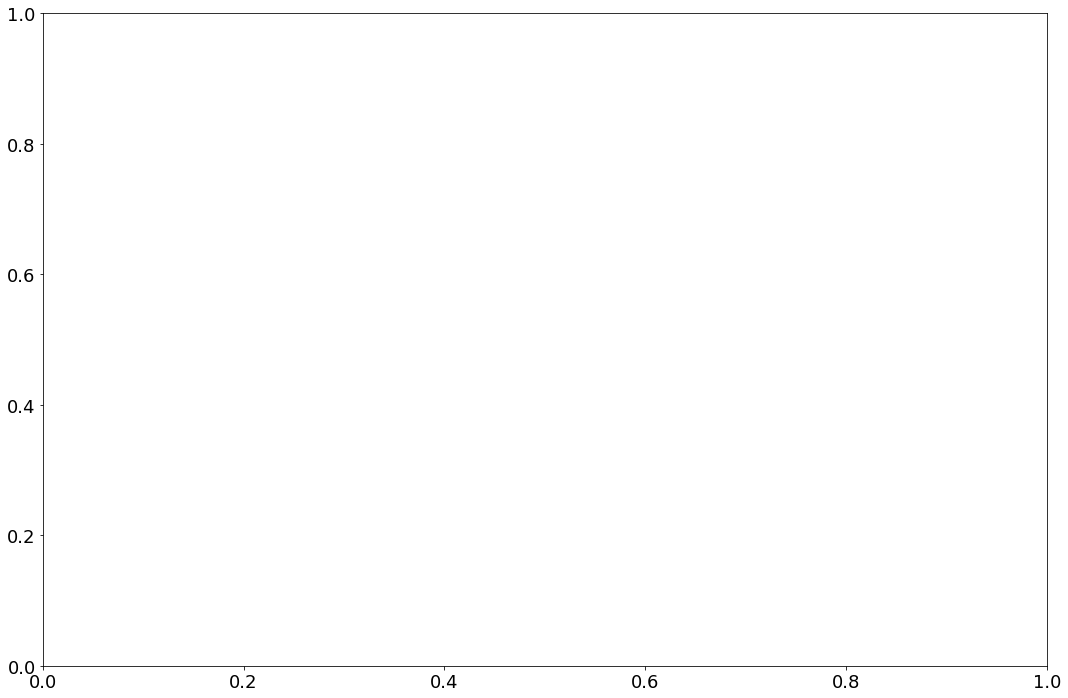

In [48]:
import matplotlib
import matplotlib.cm as cm


cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        coordonneeAPloter = lesNouvellesCoordonnees[qualite.iloc[:,i]+qualite.iloc[:,j]>0.7]
        nomDesIndividusAPloter = np.array(nomDesIndividus)[qualite.iloc[:,i]+qualite.iloc[:,j]>0.7]
        factor_qualite =  qualite[qualite.iloc[:,i]+qualite.iloc[:,j]>0.7]
        colors = cm.rainbow(np.linspace(0, 1,len(np.unique(nomDesIndividusAPloter))+1))
        #colors = zip(nomDesIndividusAPloter)
        factor = factor_qualite.iloc[:,i]+qualite.iloc[:,j]
        s_linear = factor_qualite
        plt.scatter(coordonneeAPloter[:,i],coordonneeAPloter[:,j],s=s_linear*1000,marker=matplotlib.markers.CARETUPBASE)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        if len(nomDesIndividusAPloter) != 0 and len(nomDesIndividus) < 500:
            for k in  range(len(nomDesIndividusAPloter)):
                plt.annotate( nomDesIndividusAPloter[k],(coordonneeAPloter[k,i], coordonneeAPloter[k,j]),)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))


In [ ]:
#Use for evolution annuel des variables
'''for i, (ligne,label) in enumerate(zip(X, nomDesIndividus)):
    plt.plot(ligne, label=label,
             color = couleurs[i%len(couleurs)],
             linestyle=linestyles[(i//len(couleurs))%len(linestyles)])
plt.plot(moyennes,'k-',label="moyenne",linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True,fontsize=15)
plt.grid(True)
plt.xlabel("Mois de l'année")
plt.ylabel("Moyenne mensuelle de Température [$^oC$]") ;'''

### Reconstruction des données à partir d'une partie des composantes :

#### Les données reconstruites

In [49]:
# on reprend l'acp en limitant le nombre de facteurs
acp_ = PCA(n_components=d)
acp_.fit(Xcr)
# on determine le Xcr reconsrtuit a partir d'un nombre reduit de composantes de l'acp
Xcr_ = acp_.fit_transform(Xcr).dot(acp_.components_)+acp_.mean_
# et on en deduit le X reconstruit
X_ = Xcr_*ecartTypes+moyennes
X_= pd.DataFrame(data=X_, index=nomDesIndividus, columns=nomDesVariables)
#help(acp.fit_transform)
X_.columns = ['~' + str(col) for col in X_.columns]
X_

,~t2,~tcc,~lsp,~cp,~ssr,~CO2
1982,2.87783,0.77486,0.00266,0.00101,5.48847e+06,344.51550
1983,2.67433,0.79695,0.00294,0.00110,5.31855e+06,339.12478
1984,2.84136,0.79715,0.00297,0.00111,5.32173e+06,342.05633
1985,3.18988,0.71721,0.00188,0.00076,5.92558e+06,354.71600
1986,3.13376,0.74073,0.00221,0.00087,5.74925e+06,351.81076
1987,3.81547,0.75006,0.00248,0.00096,5.69890e+06,363.08129
1988,3.16946,0.74932,0.00234,0.00091,5.68637e+06,351.74111
1989,3.17199,0.78349,0.00284,0.00107,5.43248e+06,349.00332
1990,3.19971,0.76811,0.00262,0.00100,5.54758e+06,350.74506
1991,4.03794,0.76103,0.00269,0.00103,5.62359e+06,366.11430


#### valeurs originales (pour comparaison) :

In [50]:
df.iloc[indice_individus,indice_variables]

,t2,tcc,lsp,cp,ssr,CO2
1982,2.87246,0.76520,0.00246,0.00110,5.49229e+06,341.48542
1983,2.43976,0.79330,0.00317,0.00105,5.33071e+06,343.03004
1984,3.12683,0.79363,0.00284,0.00105,4.92312e+06,344.65758
1985,3.24792,0.70742,0.00203,0.00082,6.15350e+06,346.04196
1986,2.99354,0.72956,0.00220,0.00097,5.92569e+06,347.38854
1987,4.66891,0.77414,0.00228,0.00095,5.83402e+06,349.16350
1988,3.22479,0.75178,0.00240,0.00088,5.68151e+06,351.58300
1989,2.84035,0.77344,0.00285,0.00111,5.42076e+06,353.06900
1990,3.34652,0.78841,0.00236,0.00098,5.47026e+06,354.37854
1991,4.32585,0.75980,0.00290,0.00103,5.84257e+06,355.58537


***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)